In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
transactions = pd.read_csv('transaction_data.csv')

In [3]:
# Выведем первые пять строк
transactions.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [4]:
# Количество строк и колонок
transactions.shape

(5315, 3)

In [5]:
# Узнаем количество пропущенных значений по каждой колонке
transactions.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [6]:
# Выведем описательную статистику по каждой из колонок ввиде датафрейма
transactions.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [7]:
# Уникальный значение по колонке transaction
transactions.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [8]:
# Уникальный значение по колонке name
transactions.name.unique()

array(['Ekaterina_Petrova', 'Irina_Fedorova', 'Ekaterina_Smirnova',
       'Lolita_Polyanova', 'Julia_Smirnova', 'Irina_Polyanova',
       'Olga_Lesnova', 'Irina_Lesnova', 'Vasilisa_Petrova',
       'Olga_Petrova', 'Irina_Smirnova', 'Vasilisa_Polyanova',
       'Masha_Ozerova', 'Masha_Fedorova', 'Lolita_Ivanova',
       'Svetlana_Petrova', 'Svetlana_Polyanova', 'Svetlana_Ozerova',
       'Irina_Ozerova', 'Vasilisa_Smirnova', 'Irina_Petrova',
       'Olga_Polyanova', 'Julia_Ozerova', 'Ekaterina_Ivanova',
       'Julia_Polyanova', 'Olga_Smirnova', 'Julia_Lesnova',
       'Svetlana_Ivanova', 'Ekaterina_Ozerova', 'Lolita_Lesnova',
       'Vasilisa_Fedorova', 'Lolita_Petrova', 'Ekaterina_Polyanova',
       'Olga_Ozerova', 'Svetlana_Lesnova', 'Olga_Ivanova',
       'Julia_Fedorova', 'Masha_Smirnova', 'Olga_Fedorova',
       'Julia_Petrova', 'Lolita_Ozerova', 'Vasilisa_Ivanova',
       'Svetlana_Fedorova', 'Irina_Ivanova', 'Ekaterina_Lesnova',
       'Masha_Polyanova', 'Svetlana_Smirnova', 'L

In [9]:
# Уникальный значение по колонке date
transactions.date.unique()

array(['2020-03-02 00:37:20', '2020-03-02 00:59:09',
       '2020-03-02 01:06:14', ..., '2020-03-02 00:07:28',
       '2020-03-02 00:09:02', '2020-03-02 01:26:13'], dtype=object)

In [10]:
# Выведем количество записей каждого из значений по колонке transaction
transaction_frequency = transactions.transaction.value_counts().to_frame().reset_index()
transaction_frequency

,index,transaction
0,successfull,3692
1,cancelled,1619
2,error,4


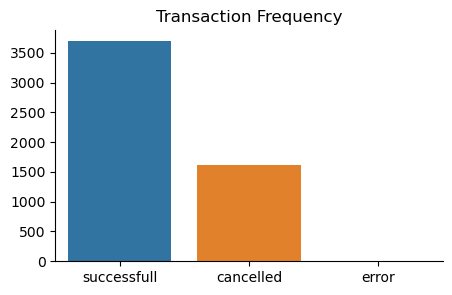

In [11]:
# Построим barplot распределение принимаемых значений по колонке transaction
plt.figure(figsize=(5,3))
sns.barplot(data = transaction_frequency, x = 'index', y = 'transaction')

# Переименуем оси и дадим название графику
plt.title('Transaction Frequency')
plt.xlabel('')
plt.ylabel('')
sns.despine()

In [12]:
# Создадим датафрейм с успешными транзакциями по пользователям
successfull_transactions = transactions \
    .query('transaction == "successfull"') \
    .groupby('name', as_index=False) \
    .agg({'date':'count'}) \
    .rename(columns={'date':'quantity'})

successfull_transactions.head()

,name,quantity
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


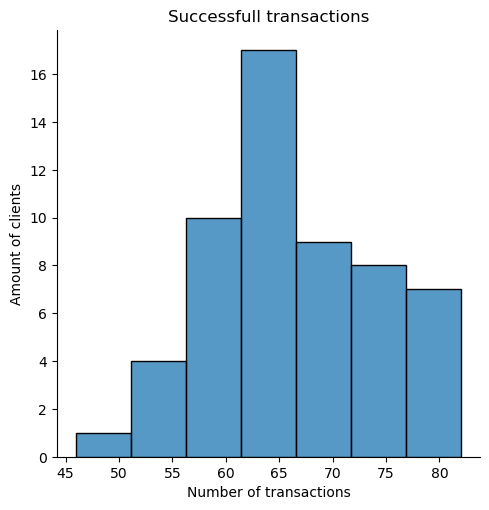

In [13]:
# Посмтроим displot распределение количества транзакций по пользователям
sns.displot(successfull_transactions.quantity)

# Переименуем оси и дадим название графику
plt.title('Successfull transactions')
plt.xlabel('Number of transactions')
plt.ylabel('Amount of clients')
sns.despine()

In [14]:
# Максимальное количесвто транзакций
successfull_transactions.max()

name        Vasilisa_Smirnova
quantity                   82
dtype: object

In [15]:
# Выведем описательную статистику датафрейма successfull_transactions
successfull_transactions.describe()

,quantity
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [16]:
# Загрузим обновленные данные транзакций
upd_transactions = pd.read_csv('transaction_data_updated.csv')
upd_transactions.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [17]:
# Построим сводную таблицу для новых данных, где индексы: минуты, колонки: имена, значения: кол-во транзакций 
pivot_table_upd_transactions = upd_transactions \
    .groupby(['name', 'minute'], as_index=False) \
    .agg({'date':'count'}) \
    .pivot(index='minute', columns='name', values='date') \
    .fillna(0)

pivot_table_upd_transactions.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [18]:
upd_transactions.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [19]:
# Переведем колонку date в тип даты и времени
upd_transactions.date = pd.to_datetime(upd_transactions.date)
upd_transactions.date

0      2020-03-02 00:37:20
1      2020-03-02 00:59:09
2      2020-03-02 01:06:14
3      2020-03-02 00:02:58
4      2020-03-02 00:17:52
               ...        
5310   2020-03-02 00:09:28
5311   2020-03-02 00:46:31
5312   2020-03-02 00:16:38
5313   2020-03-02 00:13:00
5314   2020-03-02 01:15:45
Name: date, Length: 5315, dtype: datetime64[ns]

In [20]:
upd_transactions['true_minute'] = upd_transactions.date.dt.hour * 60 + upd_transactions.date.dt.minute
upd_transactions.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


In [21]:
# Создадим датафрейм с группировкой по минутам и кол-вом транзакций
minutes_upd_transactions = upd_transactions \
    .groupby('true_minute', as_index=False) \
    .agg({'name':'count'})

minutes_upd_transactions

,true_minute,name
0,0,64
1,1,77
2,2,68
3,3,65
4,4,57
...,...,...
85,85,68
86,86,52
87,87,59
88,88,62


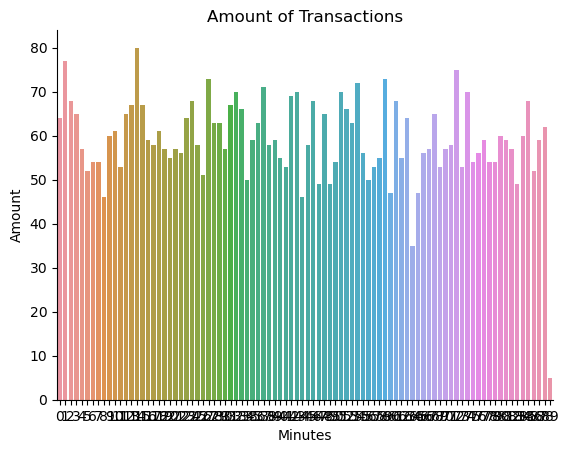

In [22]:
# Потсроим barplot датафрейма с группировкой по минутам и кол-вом транзакций
ax = sns.barplot(data=minutes_upd_transactions, x='true_minute', y='name')

# Переименуем оси и дадим название графику
ax.set_title('Amount of Transactions')
ax.set_xlabel('Minutes')
ax.set_ylabel('Amount')
sns.despine()